In [0]:
#importing packages to use
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/My Drive/input/all.csv') #load dataset


from subprocess import check_output
print(check_output(["ls", "/content/drive/My Drive/input"]).decode("utf8"))

Mounted at /content/drive
all.csv



In [0]:
df = pd.read_csv('all.csv')

In [0]:
df.head() #getting top 5 head

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [0]:
df.shape #getting shape

(573, 5)

In [0]:
df.info() #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     573 non-null    object
 1   content    573 non-null    object
 2   poem name  571 non-null    object
 3   age        573 non-null    object
 4   type       573 non-null    object
dtypes: object(5)
memory usage: 22.5+ KB


2 values are missing in poem name

In [0]:
df.isnull().sum() #checking again null vaules

author       0
content      0
poem name    2
age          0
type         0
dtype: int64

In [0]:
df.groupby('type').count()

,author,content,poem name,age
type,,,,
Love,326,326,326,326
Mythology & Folklore,59,59,58,59
Nature,188,188,187,188


In [0]:
#looking in content
df['content']

0      Let the bird of loudest lay\r\nOn the sole Ara...
1      Sir Charles into my chamber coming in,\r\nWhen...
2      Our vice runs beyond all that old men saw,\r\n...
3      Lo I the man, whose Muse whilome did maske,\r\...
4      Long have I longd to see my love againe,\r\nSt...
                             ...                        
568    With the man I love who loves me not,\r\nI wal...
569    Hart Crane, "Voyages I, II, III, IV, V, VI" fr...
570    When you are old and grey and full of sleep,\r...
571    Give me hunger,\r\nO you gods that sit and giv...
572    Potuia, potuia\r\nWhite grave goddess,\r\nPity...
Name: content, Length: 573, dtype: object

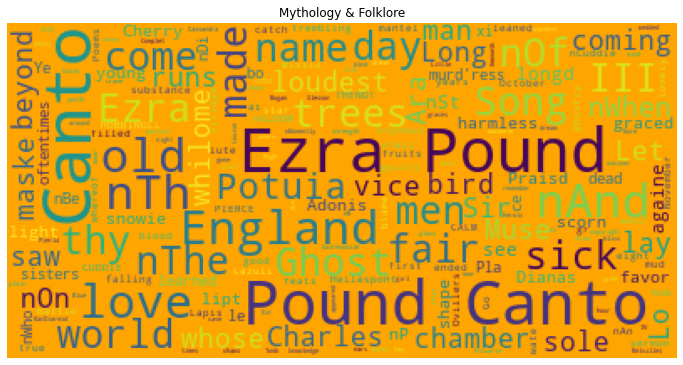

In [0]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Mythology & Folklore']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.title('Mythology & Folklore')
plt.axis('off')
plt.show()

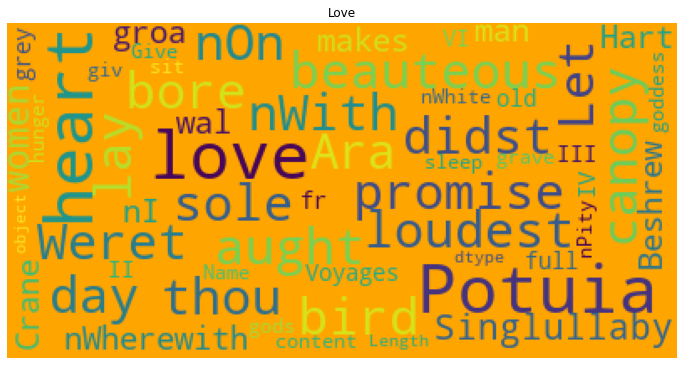

In [0]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Love']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.title('Love')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

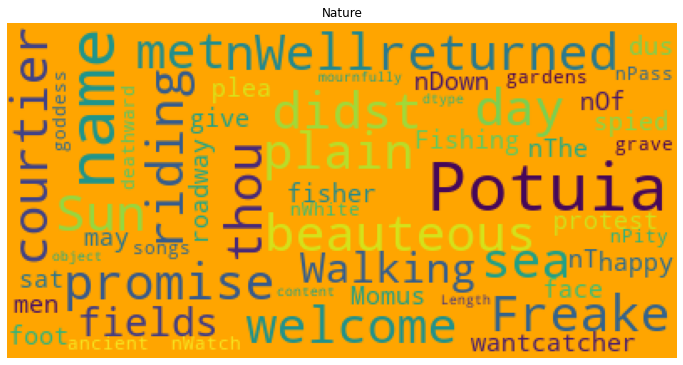

In [0]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='orange',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=15
                         ).generate(str(df[df['type']=='Nature']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.title('Nature')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

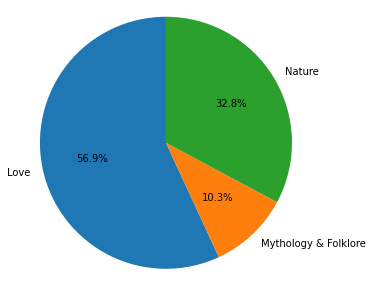

In [0]:
labels = 'Love', 'Mythology & Folklore', 'Nature'
sizes = [326, 59, 188]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

1. In our dataset we have html tag. we have to remove it first

In [0]:
#function to remove ounctuation
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)


#getting stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words("english")) 


#function to remove stopwords
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)


def processText(x):
    x= removePunctuation(x)
    x= removeStopwords(x)
    return x

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
X= pd.Series([word_tokenize(processText(x)) for x in df['content']])
X.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [let, bird, loudest, layon, sole, arabian, tre...
1    [sir, charles, chamber, coming, writing, fairy...
2    [vice, runs, beyond, old, men, saw, far, authe...
3    [lo, man, whose, muse, whilome, maske, time, t...
4    [long, longd, see, love, againe, still, wisht,...
dtype: object

In [0]:
#vectorizing X and y to process
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(df['content'], df['author'])
vect = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true')
print(df.type)
y = vect.fit_transform(df.type)

0      Mythology & Folklore
1      Mythology & Folklore
2      Mythology & Folklore
3      Mythology & Folklore
4      Mythology & Folklore
               ...         
568                    Love
569                    Love
570                    Love
571                    Love
572                    Love
Name: type, Length: 573, dtype: object


In [0]:
''' New cell '''
#vectorizing X and y to process
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(df['content'], df['author'])
transform = {
    "Mythology & Folklore" : 2,
    "Nature" : 1,
    "Love" :  0,
}
y = []
for typ in df.type:
    y.append(transform[typ])
y = np.array(y)

In [0]:
''' New Cell'''
#Oversampling to balance the data
from imblearn.over_sampling import RandomOverSampler
overSampler = RandomOverSampler()
X, y = overSampler.fit_resample(X, y)

#Split data into train, valid and test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_temp, y_train_temp, test_size=0.125, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Micro-averaging & Macro-averaging** 
To measure a multi-class classifier we have to average out the classes somehow. There are two different methods of doing this called micro-averaging and macro-averaging.   

  
In **micro-averaging** all TPs, TNs, FPs and FNs for each class are summed up and then the average is taken.      
**Macro-averaging** is straight forward. We just take the average of the precision and recall of the system on different sets.   

 **Hamming-Loss** is the fraction of labels that are incorrectly predicted

In [0]:
#sgd classifier

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)

#Cross validation
cv_scores = cross_val_score(classifier, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("accuracy on test data : ", accuracy_score(y_test, predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

[0.75362319 0.72463768 0.72463768 0.72463768 0.82352941 0.72058824
 0.73529412 0.77941176 0.64705882 0.72058824]
accuracy : 0.9046822742474916
accuracy on test data :  0.7448979591836735
macro f1 score : 0.740972705607121
micro f1 scoore : 0.7448979591836735
hamming loss : 0.25510204081632654
Precision recall report :
               precision    recall  f1-score   support

           0       0.79      0.63      0.70        97
           1       0.73      0.72      0.73        97
           2       0.73      0.88      0.80       100

    accuracy                           0.74       294
   macro avg       0.75      0.74      0.74       294
weighted avg       0.75      0.74      0.74       294



In [0]:
from sklearn.linear_model import LogisticRegression

#logistic regression
classifier_lr = LogisticRegression(max_iter=2000,solver='liblinear', multi_class='ovr', n_jobs=-1)

#classifier = OneVsRestClassifier(LogisticRegression(penalty='l2'), n_jobs=-1)

#Cross validation
cv_scores = cross_val_score(classifier_lr, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

classifier_lr.fit(X_train_temp, y_train_temp)

predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train_temp, y_train_temp))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[0.8115942  0.72463768 0.8115942  0.82608696 0.79411765 0.73529412
 0.73529412 0.79411765 0.70588235 0.89705882]
accuracy : 0.8406432748538012
macro f1 score : 0.6900618187443155
micro f1 scoore : 0.6904761904761905
hamming loss : 0.30952380952380953
Precision recall report :
               precision    recall  f1-score   support

           0       0.70      0.59      0.64        97
           1       0.60      0.81      0.69        97
           2       0.83      0.67      0.74       100

    accuracy                           0.69       294
   macro avg       0.71      0.69      0.69       294
weighted avg       0.71      0.69      0.69       294



In [0]:
#linear svc classifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

classifier = OneVsRestClassifier(SVC(kernel='rbf', random_state=0, gamma=0.002, C=45), n_jobs=-1)
# classifier = OneVsRestClassifier(LinearSVC(random_state=0, tol=1e-5), n_jobs=-1)

#Cross validation
cv_scores = cross_val_score(classifier, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

classifier.fit(X_train_temp, y_train_temp)
predictions = classifier.predict(X_test)


print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

[0.75362319 0.72463768 0.7826087  0.79710145 0.83823529 0.73529412
 0.69117647 0.76470588 0.69117647 0.82352941]
accuracy : 0.9247491638795987
macro f1 score : 0.7576423427096074
micro f1 scoore : 0.7653061224489794
hamming loss : 0.23469387755102042
Precision recall report :
               precision    recall  f1-score   support

           0       0.84      0.59      0.69        97
           1       0.71      0.75      0.73        97
           2       0.77      0.95      0.85       100

    accuracy                           0.77       294
   macro avg       0.77      0.76      0.76       294
weighted avg       0.77      0.77      0.76       294



In [0]:
#decision tree classifiers, added
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1200, max_depth=20, random_state=0)
# classifier = tree.DecisionTreeClassifier()

#Cross validation
cv_scores = cross_val_score(classifier, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

classifier.fit(X_train_temp, y_train_temp)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

[0.72463768 0.73913043 0.79710145 0.75362319 0.79411765 0.72058824
 0.70588235 0.75       0.73529412 0.80882353]
accuracy : 0.9247491638795987
macro f1 score : 0.7523271415898828
micro f1 scoore : 0.7585034013605442
hamming loss : 0.24149659863945577
Precision recall report :
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        97
           1       0.67      0.63      0.65        97
           2       0.83      0.95      0.88       100

    accuracy                           0.76       294
   macro avg       0.75      0.76      0.75       294
weighted avg       0.75      0.76      0.75       294



In [0]:
#kNN classifier, added
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

#Cross validation
cv_scores = cross_val_score(classifier, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test.todense())

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

[0.57971014 0.65217391 0.73913043 0.72463768 0.70588235 0.57352941
 0.54411765 0.66176471 0.70588235 0.63235294]
accuracy : 0.7759197324414716
macro f1 score : 0.6662562732471697
micro f1 scoore : 0.6700680272108843
hamming loss : 0.3299319727891156
Precision recall report :
               precision    recall  f1-score   support

           0       0.79      0.54      0.64        97
           1       0.55      0.63      0.59        97
           2       0.72      0.84      0.77       100

    accuracy                           0.67       294
   macro avg       0.69      0.67      0.67       294
weighted avg       0.69      0.67      0.67       294



In [0]:
print(X_train.shape)
print(y_train.shape)

#GradBoost classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)

#Cross validation
cv_scores = cross_val_score(classifier, X_train_temp, y_train_temp, cv=10)
print(cv_scores)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test.todense())

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

(598, 3495)
(598,)
[0.72463768 0.72463768 0.82608696 0.86956522 0.82352941 0.76470588
 0.75       0.76470588 0.75       0.82352941]
accuracy : 0.9247491638795987
macro f1 score : 0.770757856466875
micro f1 scoore : 0.7755102040816326
hamming loss : 0.22448979591836735
Precision recall report :
               precision    recall  f1-score   support

           0       0.85      0.66      0.74        97
           1       0.69      0.71      0.70        97
           2       0.80      0.95      0.87       100

    accuracy                           0.78       294
   macro avg       0.78      0.77      0.77       294
weighted avg       0.78      0.78      0.77       294



In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import concatenate, Input, multiply, subtract, average
import keras.backend as K
from keras.layers import Lambda
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation, GRU
from keras import regularizers
from keras import losses
from keras import optimizers
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [0]:
#This architecture is not used, the one used is in next block.
max_hypothesis_length, max_evidence_length = 3495, 1
epochs = 500
batch_size = 32
fcl = 256
LSTM_lenght = 64
vector_lenght = 1
callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

opti = optimizers.adam(learning_rate=0.001) #used to be 1e-4

num_folds=10
validation_split = 0.2
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

#X_train_d=np.reshape(np.asarray(X_train_temp.todense()), (684,3495,1))
#X_valid_d=np.reshape(np.asarray(X_valid.todense()), (51,3495,1))
#print(X_train_d_a.shape)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train_temp, y_train_temp):
  # Define the model architecture
  model = Sequential()
  #model.add(LSTM(64, input_shape=(max_hypothesis_length, 1),return_sequences=True))
  model.add(Dense(256, input_shape=(max_hypothesis_length,)))
  model.add(Dropout(0.4)) #0.4
  model.add(Dense(256))
  model.add(Dropout(0.4)) #0.2
  #model.add(LSTM(64, input_shape=(max_hypothesis_length, 1),return_sequences=True))
  #model.add(Dropout(0.4)) #0.2
  #model.add(LSTM(64, input_shape=(max_hypothesis_length, 1)))
  model.add(Dense(50, kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.4)) #0.4
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy' , optimizer=opti, metrics=['accuracy'])
  if fold_no == 1:
    model.summary()



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  #np.array(X_train).reshape((350, 3495, 1))
  model.fit(X_train_temp[train], y_train_temp[train], \
                          epochs=epochs, batch_size=batch_size, verbose=0,\
            validation_split=validation_split,  callbacks=callbacks)
  
    # Generate generalization metrics
  scores = model.evaluate(X_train_temp[test], y_train_temp[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 256)               894976    
_________________________________________________________________
dropout_107 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_108 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 50)                12850     
_________________________________________________________________
dropout_109 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 3)               

In [0]:
y_train_t = np.zeros((y_train.shape[0], 3))
y_valid_t = np.zeros((y_valid.shape[0], 3))
y_test_t = np.zeros((y_test.shape[0], 3))
for i in range(len(y_train)):
    y_train_t[i][y_train[i]] = 1
    
for i in range(len(y_valid)):
    y_valid_t[i][y_valid[i]] = 1
    
for i in range(len(y_test)):
    y_test_t[i][y_test[i]] = 1

max_hypothesis_length, max_evidence_length = 3495, 1
epochs = 1000
batch_size = 64
fcl = 256
LSTM_lenght = 64
vector_lenght = 1
callbacks = [EarlyStopping(monitor='val_loss', patience=100),
             ModelCheckpoint(filepath='best_model1.h5', monitor='val_loss', save_best_only=True)]

opti = optimizers.adam(learning_rate=0.001) #used to be 1e-4

num_folds=10
validation_split = 0.2
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

#X_train_d=np.reshape(np.asarray(X_train_temp.todense()), (684,3495,1))
#X_valid_d=np.reshape(np.asarray(X_valid.todense()), (51,3495,1))
#print(X_train_d_a.shape)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train_temp, y_train_temp):
  # Define the model architecture
  model = Sequential() 
  model.add(Dense(1024, activation='relu', input_shape=(3495,)))
  model.add(Dropout(0.6))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(3, activation='softmax'))
  if fold_no == 1:
    model.summary()



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  #np.array(X_train).reshape((350, 3495, 1))
  model.fit(X_train, y_train_t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_valid, y_valid_t), callbacks=callbacks)
  
    # Generate generalization metrics
  scores = model.evaluate(X_test, y_test_t, verbose=0)
  
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              3579904   
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)              